In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 700)

In [5]:
df = pd.read_csv('../Data/prediction_data.csv', index_col='Unnamed: 0')

In [6]:
df.head()

,fighter1,fighter2,winner,weight_class,title_fight,method,end_round,figth_year,attended,fight_coutry,win_fighter1,lose_fighter1,draw_fighter1,nc_fighter1,height_fighter1,reach_fighter1,stance_fighter1,SLpM_fighter1,Str_Acc_fighter1,SApM_fighter1,Str_Def_fighter1,TD_Avg_fighter1,TD_Acc_fighter1,TD_Def_fighter1,Sub_Avg_fighter1,win%_fighter1,born_year_fighter1,win_fighter2,lose_fighter2,draw_fighter2,nc_fighter2,height_fighter2,reach_fighter2,stance_fighter2,SLpM_fighter2,Str_Acc_fighter2,SApM_fighter2,Str_Def_fighter2,TD_Avg_fighter2,TD_Acc_fighter2,TD_Def_fighter2,Sub_Avg_fighter2,win%_fighter2,born_year_fighter2
0,Santiago Ponzinibbio,Neil Magny,1,Welterweight,f,KO/TKO,4,2018,10245.0,Argentina,28,3,0,0,"6' 0""","73""",Orthodox,4.27,39.0,4.02,64.0,0.54,44.0,60.0,0.0,90.322580,1986,21,8,0,0,"6' 3""","80""",Orthodox,3.86,46.0,2.22,56.0,2.62,46.0,60.0,0.3,72.413795,1987
1,Darren Elkins,Ricardo Lamas,0,Featherweight,f,KO/TKO,3,2018,10245.0,Argentina,25,7,0,0,"5' 10""","71""",Orthodox,3.36,37.0,2.83,53.0,2.68,35.0,57.0,1.3,78.125000,1984,19,7,0,0,"5' 8""","71""",Orthodox,2.87,45.0,2.61,59.0,1.66,32.0,47.0,1.0,73.076920,1982
2,Johnny Walker,Khalil Rountree Jr.,1,Light Heavyweight,f,KO/TKO,1,2018,10245.0,Argentina,15,3,0,0,"6' 5""","82""",Orthodox,5.37,70.0,3.36,25.0,0.89,100.0,100.0,2.6,83.333336,1992,8,2,0,2,"6' 1""","76""",Southpaw,2.30,34.0,3.29,38.0,0.00,0.0,50.0,0.3,66.666664,1990
3,Cezar Ferreira,Ian Heinisch,0,Middleweight,f,DEC,3,2018,10245.0,Argentina,14,7,0,0,"6' 1""","78""",Southpaw,1.83,42.0,2.14,55.0,2.97,59.0,90.0,0.5,66.666664,1985,12,1,0,0,"5' 11""",NaN,Orthodox,3.49,58.0,1.67,52.0,0.81,14.0,50.0,1.6,92.307690,1988
4,Marlon Vera,Guido Cannetti,1,Bantamweight,f,SUB,2,2018,10245.0,Argentina,12,5,1,0,"5' 8""","70""",Switch,3.23,44.0,3.93,52.0,0.78,37.0,68.0,1.3,66.666664,1992,8,5,0,0,"5' 6""","68""",Southpaw,2.80,52.0,1.95,51.0,2.80,50.0,75.0,0.3,61.538460,1979


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4591 entries, 0 to 4590
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fighter1            4591 non-null   object 
 1   fighter2            4591 non-null   object 
 2   winner              4591 non-null   int64  
 3   weight_class        4591 non-null   object 
 4   title_fight         4591 non-null   object 
 5   method              4591 non-null   object 
 6   end_round           4591 non-null   int64  
 7   figth_year          4591 non-null   int64  
 8   attended            4413 non-null   float64
 9   fight_coutry        4591 non-null   object 
 10  win_fighter1        4591 non-null   int64  
 11  lose_fighter1       4591 non-null   int64  
 12  draw_fighter1       4591 non-null   int64  
 13  nc_fighter1         4591 non-null   int64  
 14  height_fighter1     4590 non-null   object 
 15  reach_fighter1      4282 non-null   object 
 16  stance

In [8]:
df.isna().sum()

fighter1                0
fighter2                0
winner                  0
weight_class            0
title_fight             0
method                  0
end_round               0
figth_year              0
attended              178
fight_coutry            0
win_fighter1            0
lose_fighter1           0
draw_fighter1           0
nc_fighter1             0
height_fighter1         1
reach_fighter1        309
stance_fighter1       114
SLpM_fighter1           0
Str_Acc_fighter1        0
SApM_fighter1           0
Str_Def_fighter1        0
TD_Avg_fighter1         0
TD_Acc_fighter1         0
TD_Def_fighter1         0
Sub_Avg_fighter1        0
win%_fighter1           0
born_year_fighter1      0
win_fighter2            0
lose_fighter2           0
draw_fighter2           0
nc_fighter2             0
height_fighter2         2
reach_fighter2        321
stance_fighter2       133
SLpM_fighter2           0
Str_Acc_fighter2        0
SApM_fighter2           0
Str_Def_fighter2        0
TD_Avg_fight

In [13]:
# Categorical columns

df.select_dtypes(include='object').columns.to_list()

['fighter1',
 'fighter2',
 'weight_class',
 'title_fight',
 'method',
 'fight_coutry',
 'height_fighter1',
 'reach_fighter1',
 'stance_fighter1',
 'born_year_fighter1',
 'height_fighter2',
 'reach_fighter2',
 'stance_fighter2',
 'born_year_fighter2']

In [14]:
# Data cleaning process

In [22]:
df.weight_class.nunique()

15

In [16]:
df.title_fight.nunique()

2

In [20]:
df.method.unique()

array(['KO/TKO', 'DEC', 'SUB', 'DQ'], dtype=object)

In [19]:
df.end_round.unique()

array([4, 3, 1, 2, 5], dtype=int64)

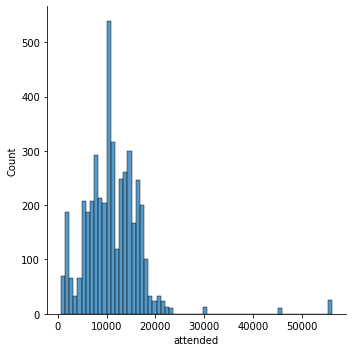

In [23]:
sns.displot(df.attended)

In [29]:
df.corr()

,winner,end_round,figth_year,attended,win_fighter1,lose_fighter1,draw_fighter1,nc_fighter1,SLpM_fighter1,Str_Acc_fighter1,SApM_fighter1,Str_Def_fighter1,TD_Avg_fighter1,TD_Acc_fighter1,TD_Def_fighter1,Sub_Avg_fighter1,win%_fighter1,win_fighter2,lose_fighter2,draw_fighter2,nc_fighter2,SLpM_fighter2,Str_Acc_fighter2,SApM_fighter2,Str_Def_fighter2,TD_Avg_fighter2,TD_Acc_fighter2,TD_Def_fighter2,Sub_Avg_fighter2,win%_fighter2
winner,1.000000,-0.018130,-0.005840,-0.009764,0.126802,-0.049843,-0.038948,0.002999,0.175695,0.122357,-0.129138,0.174462,0.090205,0.079596,0.183430,0.015688,0.224583,-0.107310,0.063618,0.036244,-0.007744,-0.168036,-0.099336,0.146272,-0.180248,-0.103134,-0.138743,-0.155620,-0.010804,-0.238281
end_round,-0.018130,1.000000,0.126045,0.036223,0.031266,-0.049402,-0.000954,-0.012720,0.051061,-0.042423,-0.072534,0.150351,0.018115,0.013811,0.099914,-0.115694,0.090062,0.032332,-0.033524,-0.009711,-0.036919,0.080233,-0.034308,-0.047267,0.165036,0.004094,0.010407,0.128383,-0.121678,0.098341
figth_year,-0.005840,0.126045,1.000000,0.151311,-0.212669,-0.374280,-0.178581,-0.080092,0.329032,0.021480,0.171283,0.090787,-0.035410,-0.082979,0.164843,-0.157113,0.305327,-0.225775,-0.370515,-0.189867,-0.071918,0.343441,0.040071,0.149742,0.127992,0.000750,-0.051819,0.196077,-0.165692,0.292948
attended,-0.009764,0.036223,0.151311,1.000000,0.053087,-0.027058,-0.022073,-0.012617,0.112831,0.059049,-0.020617,0.070915,0.032443,0.044818,0.093218,-0.002730,0.108714,0.016448,-0.040820,-0.058486,-0.009811,0.086567,0.018311,-0.004400,0.083308,0.002576,0.003664,0.049795,-0.034714,0.083901
win_fighter1,0.126802,0.031266,-0.212669,0.053087,1.000000,0.648061,0.285033,0.215684,-0.036303,0.060059,-0.210025,0.139240,0.060708,0.155354,0.088144,0.090370,0.168395,0.251447,0.227743,0.059698,0.058826,-0.084628,0.016641,-0.101689,0.044926,0.056444,0.058502,0.030949,0.045900,-0.023992
lose_fighter1,-0.049843,-0.049402,-0.374280,-0.027058,0.648061,1.000000,0.286481,0.184453,-0.176960,-0.024652,-0.064064,-0.031771,-0.081282,0.084169,-0.044726,0.070305,-0.524242,0.227300,0.252714,0.093744,0.089497,-0.111211,0.000728,-0.089556,0.006776,0.020014,0.051056,-0.041775,0.080455,-0.102764
draw_fighter1,-0.038948,-0.000954,-0.178581,-0.022073,0.285033,0.286481,1.000000,0.077575,-0.113228,0.017474,-0.061454,-0.001319,-0.036461,0.040939,-0.048503,0.001608,-0.194239,0.073774,0.073945,0.053759,0.025742,-0.072296,-0.011600,-0.052766,-0.009942,0.017378,0.022956,-0.045163,0.023245,-0.040090
nc_fighter1,0.002999,-0.012720,-0.080092,-0.012617,0.215684,0.184453,0.077575,1.000000,-0.021423,0.039063,-0.025401,-0.016313,-0.023024,0.070623,0.029893,-0.000328,-0.150628,0.084488,0.088977,0.051064,0.041421,-0.004594,0.017081,0.012878,-0.015194,-0.009667,-0.006336,-0.023762,0.009185,-0.032296
SLpM_fighter1,0.175695,0.051061,0.329032,0.112831,-0.036303,-0.176960,-0.113228,-0.021423,1.000000,0.277246,0.310116,0.262263,-0.137571,0.080701,0.314855,-0.215682,0.242269,-0.066314,-0.091531,-0.052576,0.006202,0.213558,0.000549,0.276327,-0.020239,-0.062267,-0.069025,0.032929,-0.116241,0.052403
Str_Acc_fighter1,0.122357,-0.042423,0.021480,0.059049,0.060059,-0.024652,0.017474,0.039063,0.277246,1.000000,-0.188079,-0.104734,0.150905,0.180989,0.091661,0.021612,0.123429,-0.031898,-0.013868,-0.009781,0.006718,-0.044310,0.061797,0.046469,-0.225984,-0.020467,-0.043064,-0.017890,-0.012532,-0.027413


In [31]:
df.drop('attended', axis=1, inplace=True)

In [32]:
df[df.height_fighter1.isna() == True]

,fighter1,fighter2,winner,weight_class,title_fight,method,end_round,figth_year,fight_coutry,win_fighter1,lose_fighter1,draw_fighter1,nc_fighter1,height_fighter1,reach_fighter1,stance_fighter1,SLpM_fighter1,Str_Acc_fighter1,SApM_fighter1,Str_Def_fighter1,TD_Avg_fighter1,TD_Acc_fighter1,TD_Def_fighter1,Sub_Avg_fighter1,win%_fighter1,born_year_fighter1,win_fighter2,lose_fighter2,draw_fighter2,nc_fighter2,height_fighter2,reach_fighter2,stance_fighter2,SLpM_fighter2,Str_Acc_fighter2,SApM_fighter2,Str_Def_fighter2,TD_Avg_fighter2,TD_Acc_fighter2,TD_Def_fighter2,Sub_Avg_fighter2,win%_fighter2,born_year_fighter2
1550,Tom Blackledge,Anthony Perosh,0,Light Heavyweight,f,SUB,1,2011,Australia,10,7,0,0,NaN,NaN,NaN,2.91,61.0,2.55,46.0,0.0,0.0,75.0,0.0,58.82353,unk,15,10,0,0,"6' 3""","75""",Orthodox,2.27,43.0,3.77,53.0,2.03,22.0,33.0,1.1,60.0,1972


In [33]:
len(df)

4591

In [34]:
df_copy = df.dropna()

In [35]:
df_copy

,fighter1,fighter2,winner,weight_class,title_fight,method,end_round,figth_year,fight_coutry,win_fighter1,lose_fighter1,draw_fighter1,nc_fighter1,height_fighter1,reach_fighter1,stance_fighter1,SLpM_fighter1,Str_Acc_fighter1,SApM_fighter1,Str_Def_fighter1,TD_Avg_fighter1,TD_Acc_fighter1,TD_Def_fighter1,Sub_Avg_fighter1,win%_fighter1,born_year_fighter1,win_fighter2,lose_fighter2,draw_fighter2,nc_fighter2,height_fighter2,reach_fighter2,stance_fighter2,SLpM_fighter2,Str_Acc_fighter2,SApM_fighter2,Str_Def_fighter2,TD_Avg_fighter2,TD_Acc_fighter2,TD_Def_fighter2,Sub_Avg_fighter2,win%_fighter2,born_year_fighter2
0,Santiago Ponzinibbio,Neil Magny,1,Welterweight,f,KO/TKO,4,2018,Argentina,28,3,0,0,"6' 0""","73""",Orthodox,4.27,39.0,4.02,64.0,0.54,44.0,60.0,0.0,90.322580,1986,21,8,0,0,"6' 3""","80""",Orthodox,3.86,46.0,2.22,56.0,2.62,46.0,60.0,0.3,72.413795,1987
1,Darren Elkins,Ricardo Lamas,0,Featherweight,f,KO/TKO,3,2018,Argentina,25,7,0,0,"5' 10""","71""",Orthodox,3.36,37.0,2.83,53.0,2.68,35.0,57.0,1.3,78.125000,1984,19,7,0,0,"5' 8""","71""",Orthodox,2.87,45.0,2.61,59.0,1.66,32.0,47.0,1.0,73.076920,1982
2,Johnny Walker,Khalil Rountree Jr.,1,Light Heavyweight,f,KO/TKO,1,2018,Argentina,15,3,0,0,"6' 5""","82""",Orthodox,5.37,70.0,3.36,25.0,0.89,100.0,100.0,2.6,83.333336,1992,8,2,0,2,"6' 1""","76""",Southpaw,2.30,34.0,3.29,38.0,0.00,0.0,50.0,0.3,66.666664,1990
4,Marlon Vera,Guido Cannetti,1,Bantamweight,f,SUB,2,2018,Argentina,12,5,1,0,"5' 8""","70""",Switch,3.23,44.0,3.93,52.0,0.78,37.0,68.0,1.3,66.666664,1992,8,5,0,0,"5' 6""","68""",Southpaw,2.80,52.0,1.95,51.0,2.80,50.0,75.0,0.3,61.538460,1979
6,Bartosz Fabinski,Michel Prazeres,0,Welterweight,f,SUB,1,2018,Argentina,14,3,0,0,"6' 0""","75""",Orthodox,2.22,70.0,1.35,53.0,7.17,70.0,80.0,0.0,82.352940,1986,26,2,0,0,"5' 6""","67""",Orthodox,2.59,47.0,2.32,60.0,4.22,38.0,47.0,0.7,92.857140,1981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4586,Chas Skelly,Bobby Moffett,0,Featherweight,f,SUB,2,2018,USA,17,4,0,0,"5' 11""","72""",Orthodox,2.12,40.0,3.49,47.0,1.83,34.0,35.0,2.3,80.952380,1985,14,3,0,0,"5' 10""","74""",Orthodox,3.64,52.0,2.76,48.0,3.27,100.0,50.0,2.2,82.352940,1990
4587,Davi Ramos,John Gunther,1,Lightweight,f,SUB,1,2018,USA,9,2,0,0,"5' 6""","70""",Orthodox,3.12,38.0,2.72,56.0,3.28,58.0,0.0,1.4,81.818184,1986,7,2,0,0,"5' 9""","72""",Orthodox,1.65,37.0,3.72,46.0,7.08,42.0,0.0,0.0,77.777780,1985
4588,Julian Erosa,Devonte Smith,0,Lightweight,f,KO/TKO,1,2018,USA,22,7,0,0,"6' 1""","75""",Southpaw,4.91,52.0,5.20,45.0,1.64,60.0,75.0,1.1,75.862070,1989,9,1,0,0,"5' 9""","76""",Orthodox,12.94,63.0,5.78,55.0,0.00,0.0,100.0,0.0,90.000000,1993
4589,Joseph Morales,Eric Shelton,0,Flyweight,f,DEC,3,2018,USA,9,2,0,0,"5' 6""","69""",Switch,1.58,37.0,1.72,60.0,0.53,50.0,23.0,2.6,81.818184,1994,12,5,0,0,"5' 6""","68""",Orthodox,2.75,44.0,1.63,65.0,3.40,51.0,43.0,0.2,70.588234,1991


In [36]:
df_copy.fight_coutry.nunique()

22

In [40]:
final_df = pd.get_dummies(df_copy.drop(['fighter1', 'fighter2'], axis=1))

In [46]:
# Importng 

from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

In [42]:
X = final_df.drop('winner', axis=1)
Y = final_df['winner']

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.25, random_state=45)

In [47]:
rfc = RandomForestClassifier(n_estimators=200, random_state=12)

rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)

print(f'F1 Score for Random Forest is: {f1_score(y_test, rfc_pred)} and accuracy Score is: {accuracy_score(y_test, rfc_pred)}')

F1 Score for Random Forest is: 0.6927966101694916 and accuracy Score is: 0.6982310093652445


In [48]:
xgb = XGBClassifier(n_estimators=200, random_state=12)

xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)

print(f'F1 Score for XGB is: {f1_score(y_test, xgb_pred)} and accuracy Score is: {accuracy_score(y_test, xgb_pred)}')

c:\users\maliex\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 Score for Random Forest is: 0.6956521739130435 and accuracy Score is: 0.6940686784599376


In [50]:
lr = LogisticRegression()

lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

print(f'F1 Score for LR is: {f1_score(y_test, lr_pred)} and accuracy Score is: {accuracy_score(y_test, lr_pred)}')

F1 Score for LR is: 0.6934460887949261 and accuracy Score is: 0.6982310093652445


c:\users\maliex\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
cat = CatBoostClassifier(n_estimators=200, random_state=12)

cat.fit(x_train, y_train)
cat_pred = cat.predict(x_test)

print(f'F1 Score for CAT boost is: {f1_score(y_test, cat_pred)} and accuracy Score is: {accuracy_score(y_test, cat_pred)}')

Learning rate set to 0.070813
0:	learn: 0.6830318	total: 26.8ms	remaining: 5.33s
1:	learn: 0.6730188	total: 39.4ms	remaining: 3.9s
2:	learn: 0.6619753	total: 52.5ms	remaining: 3.45s
3:	learn: 0.6550364	total: 65.3ms	remaining: 3.2s
4:	learn: 0.6472147	total: 77.9ms	remaining: 3.04s
5:	learn: 0.6397816	total: 91.3ms	remaining: 2.95s
6:	learn: 0.6341321	total: 104ms	remaining: 2.86s
7:	learn: 0.6266132	total: 117ms	remaining: 2.81s
8:	learn: 0.6209647	total: 130ms	remaining: 2.75s
9:	learn: 0.6160891	total: 142ms	remaining: 2.7s
10:	learn: 0.6116509	total: 154ms	remaining: 2.65s
11:	learn: 0.6076727	total: 169ms	remaining: 2.65s
12:	learn: 0.6035776	total: 197ms	remaining: 2.83s
13:	learn: 0.6002948	total: 210ms	remaining: 2.79s
14:	learn: 0.5963766	total: 224ms	remaining: 2.76s
15:	learn: 0.5919848	total: 236ms	remaining: 2.71s
16:	learn: 0.5886206	total: 249ms	remaining: 2.68s
17:	learn: 0.5850567	total: 262ms	remaining: 2.64s
18:	learn: 0.5818440	total: 274ms	remaining: 2.61s
19:	lear

160:	learn: 0.3616964	total: 2.52s	remaining: 610ms
161:	learn: 0.3608059	total: 2.54s	remaining: 596ms
162:	learn: 0.3596489	total: 2.55s	remaining: 580ms
163:	learn: 0.3585922	total: 2.57s	remaining: 564ms
164:	learn: 0.3575450	total: 2.58s	remaining: 548ms
165:	learn: 0.3564285	total: 2.6s	remaining: 532ms
166:	learn: 0.3550372	total: 2.61s	remaining: 516ms
167:	learn: 0.3542863	total: 2.62s	remaining: 500ms
168:	learn: 0.3528483	total: 2.64s	remaining: 484ms
169:	learn: 0.3516717	total: 2.66s	remaining: 469ms
170:	learn: 0.3514214	total: 2.67s	remaining: 453ms
171:	learn: 0.3501671	total: 2.69s	remaining: 438ms
172:	learn: 0.3490312	total: 2.71s	remaining: 423ms
173:	learn: 0.3480637	total: 2.73s	remaining: 407ms
174:	learn: 0.3464287	total: 2.74s	remaining: 391ms
175:	learn: 0.3449286	total: 2.75s	remaining: 376ms
176:	learn: 0.3435504	total: 2.77s	remaining: 360ms
177:	learn: 0.3419885	total: 2.78s	remaining: 344ms
178:	learn: 0.3411553	total: 2.8s	remaining: 328ms
179:	learn: 0.

## saving the model

In [56]:
import pickle

In [58]:
with open('../Models/first_model','wb') as file:
    pickle.dump(cat,file)